In [21]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [22]:
#import csv into pd dataframe
df = pd.read_csv('data/train.csv')


In [23]:
# check how many women and how many man survided
survive_df = df[df['Survived'] == 1]
males_df= df[df['Sex']=='male']
females_df = df[df['Sex']=='female']

# calculate total survivers, female and male survivers and males and females on board
total_survivors = survive_df['Survived'].count()
male_survivors = survive_df[survive_df['Sex']=='male']['Survived'].count()
males_on_board = males_df['Sex'].count()
female_survivors = total_survivors - male_survivors
females_on_board = females_df['Sex'].count()

# print results
print(f"Male survivors (percentage of total survivors): {male_survivors/total_survivors*100}%")
print(f"Female survivors: {female_survivors/total_survivors*100}%")
print(f"Male survivors (precentage of total males){male_survivors/males_on_board*100}%")
print(f"Female survivors (precentage of total females){female_survivors/females_on_board*100}%")

Male survivors (percentage of total survivors): 31.871345029239766%
Female survivors: 68.12865497076024%
Male survivors (precentage of total males)18.890814558058924%
Female survivors (precentage of total females)74.20382165605095%


In [37]:
#clean dataframe
df_train_x = df.drop(['Name' ,'Ticket', 'Cabin', 'Embarked'], axis=1) #drop name column
df_train_x['Sex'] = df_train_x['Sex'].map({'male': 1, 'female': 0})

df_train_y = df['Survived'] #get survived column


In [38]:
# split train and val data
X_train, X_val, y_train, y_val = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=42)
X_train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
331,332,0,1,1,45.5,0,0,28.5000
733,734,0,2,1,23.0,0,0,13.0000
382,383,0,3,1,32.0,0,0,7.9250
704,705,0,3,1,26.0,1,0,7.8542
813,814,0,3,0,6.0,4,2,31.2750
...,...,...,...,...,...,...,...,...
106,107,1,3,0,21.0,0,0,7.6500
270,271,0,1,1,NaN,0,0,31.0000
860,861,0,3,1,41.0,2,0,14.1083
435,436,1,1,0,14.0,1,2,120.0000


In [48]:
clf = DecisionTreeClassifier(max_depth=6,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [49]:
y_pred = clf.predict(X_val)

print(f"Accuracy: {accuracy_score(y_val, y_pred)*100:.2f}%")

Accuracy: 95.53%


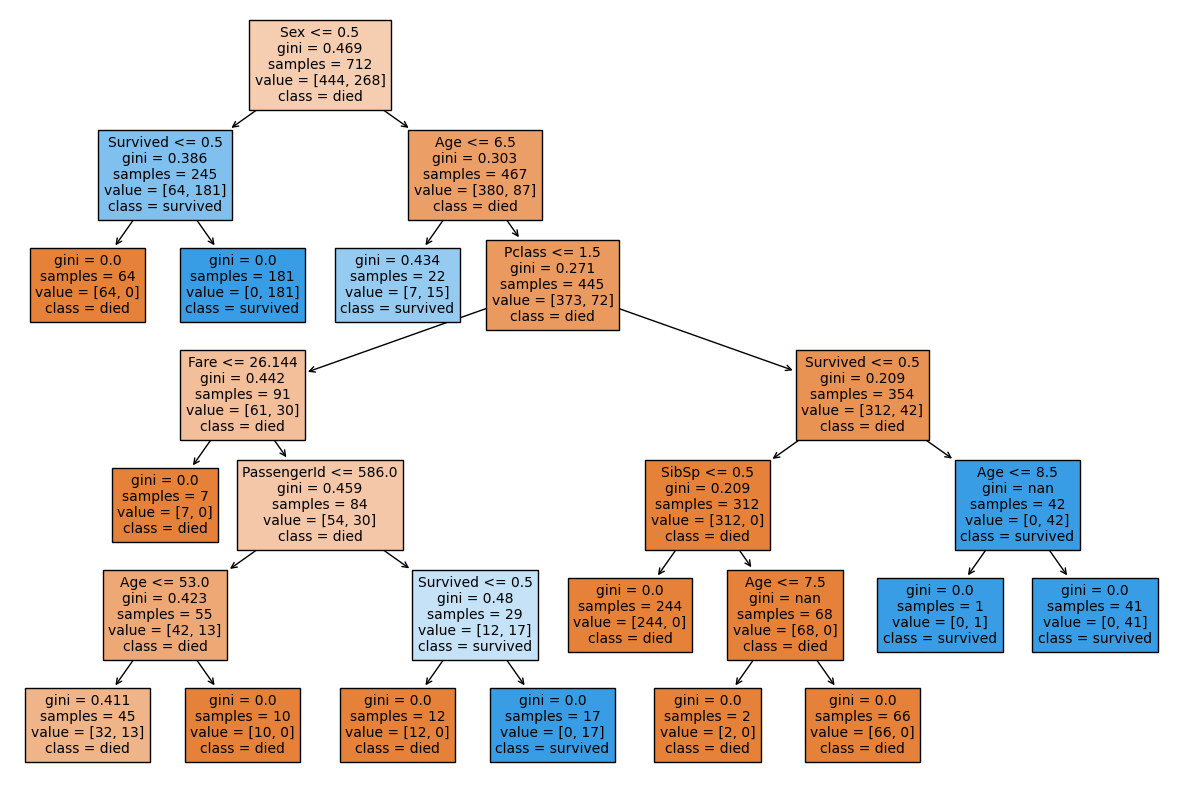

In [51]:
fig, ax = plt.subplots(figsize=(15, 10))  # adjust the size as needed
plot_tree(clf, filled=True, fontsize=10, ax=ax, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()